<a href="https://colab.research.google.com/github/saurabhshinkar/Sbsdp/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing** **Libraries**

In [3]:
#Import all library that will be used in entire project

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#for date
import datetime

#for linear regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import math

#for decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeRegressor

#for random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, confusion_matrix

#for gradient boosting
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA

# for xg boost
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# **Mount Drive And Import Data**

In [4]:
#Mount google drive for access of the play store dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing Dataset
File_path='/content/drive/MyDrive/Capstone Projects/Seoul bike sharing demand prediction/'
data= pd.read_csv(File_path + 'SeoulBikeData.csv',encoding= 'unicode_escape')

In [ ]:
# First Look 
data.head()

In [ ]:
#tail of data
data.tail()

In [ ]:
#data information
data.info()

In [ ]:
#Discription of Data
data.describe(include='all')

# **Handling Missing Vaules**

In [ ]:
#checking for null
data.isnull().any()

No null values in our data

# **Making Data In Proper Format**

In [11]:
#type of date
type(data['Date'][0])

str

In [12]:
#converting date type in to Timestamp
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
#creating new columns year,month and day
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month_name()
data['day'] = pd.DatetimeIndex(data['Date']).day_name()

In [14]:
#data head
data.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday


**Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

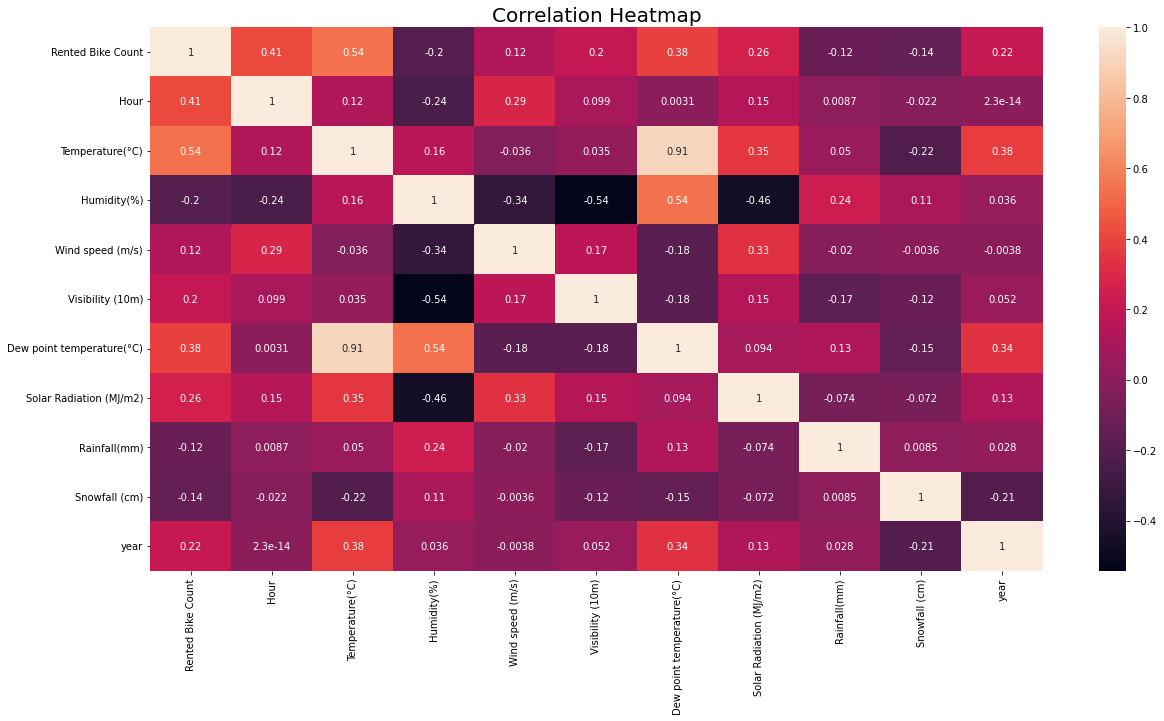

In [15]:
#Correlation Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot= True)
plt.title("Correlation Heatmap",fontsize=20)

**Drop column of Dew point temperature(°C) as there is high correlation in Temperature and Dew point temperature(°C)**

In [16]:
# Temperature(°C) and Dew point temperature(°C)
data[["Temperature(°C)","Dew point temperature(°C)"]]

,Temperature(°C),Dew point temperature(°C)
0,-5.2,-17.6
1,-5.5,-17.6
2,-6.0,-17.7
3,-6.2,-17.6
4,-6.0,-18.6
...,...,...
8755,4.2,-10.3
8756,3.4,-9.9
8757,2.6,-9.9
8758,2.1,-9.8


In [17]:
#drop Dew point temperature(°C)
data.drop(columns=['Dew point temperature(°C)'], axis=1,inplace=True)

# **EDA**

In [18]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 5 categorical variables


In [19]:
# find Numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 11 numerical variables


In [20]:
#remove date
numerical.remove('Date')

**Boxplot And Distribution Plot Of Numerical Variables**

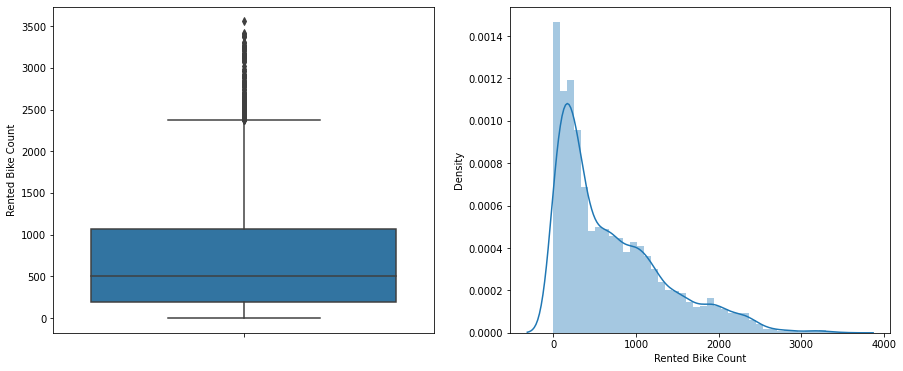

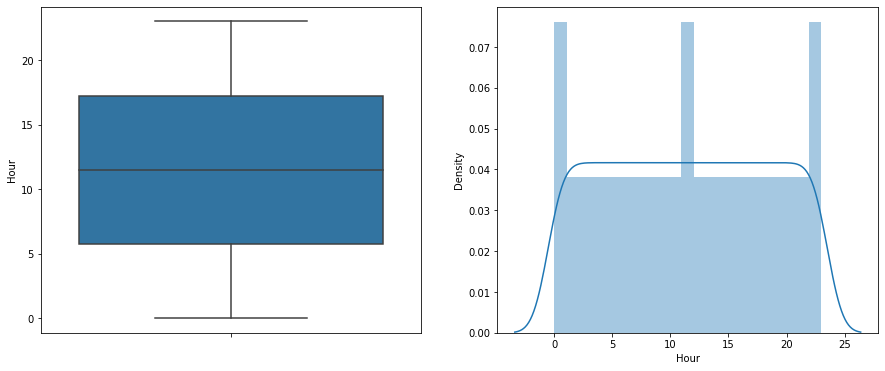

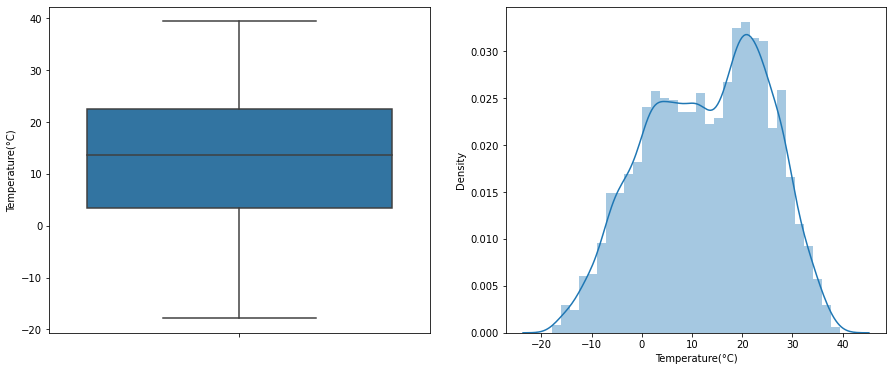

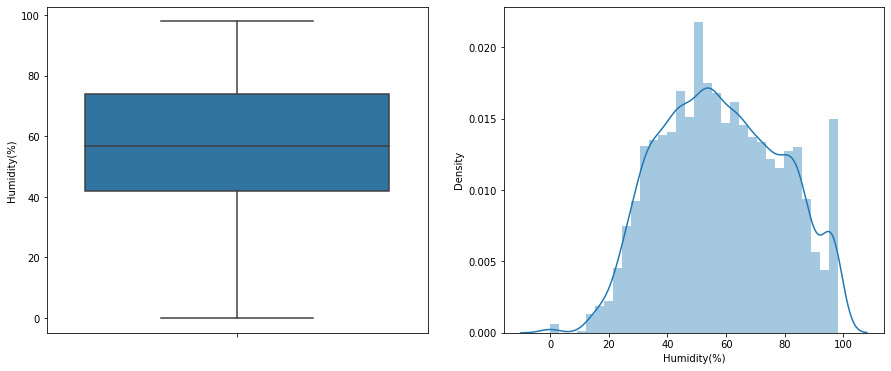

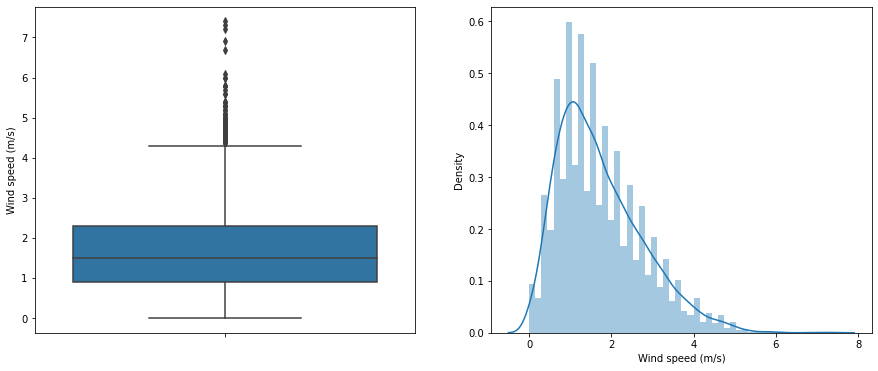

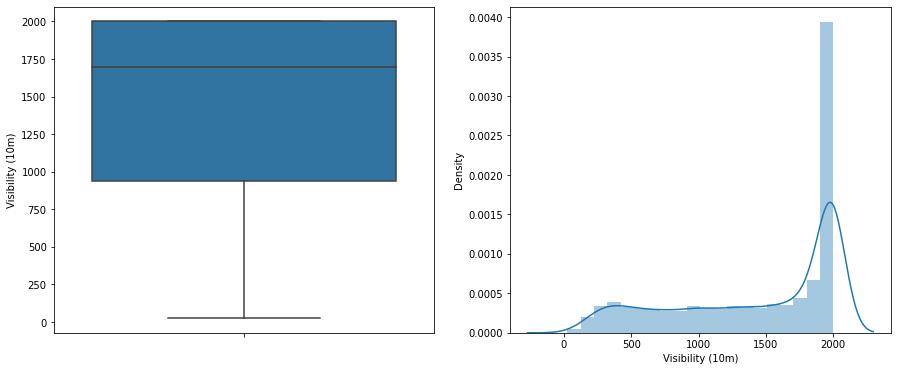

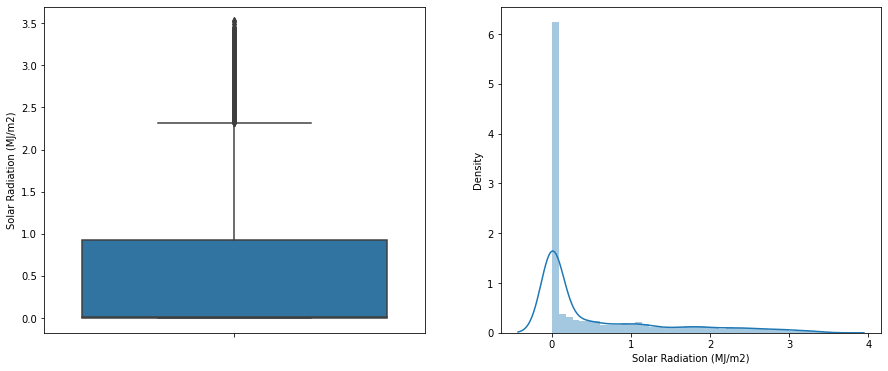

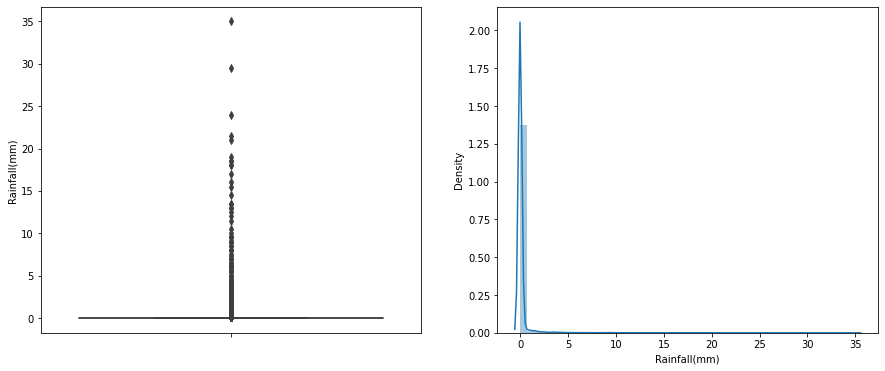

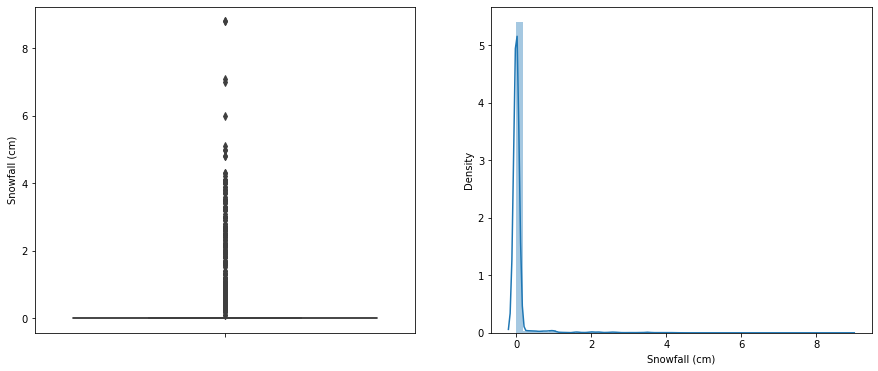

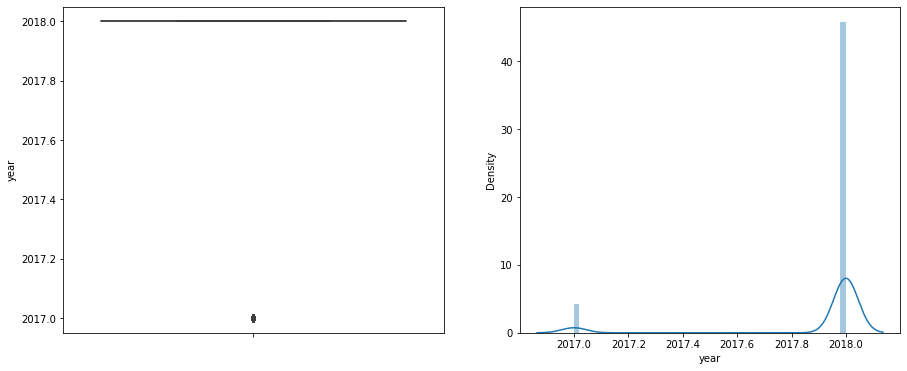

In [21]:
#Boxplot And Distribution Plot Of Numerical Variables
for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_xlabel(var)

    plt.show()

In [22]:
# Number of labels: cardinality
#Let's now check if our categorical variables have a huge number of categories. 
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

Seasons  contains  4  labels
Holiday  contains  2  labels
Functioning Day  contains  2  labels
month  contains  12  labels
day  contains  7  labels


**Mean Rented Bike Count In Different Hour**

In [23]:
#Mean Rented Bike Count By Hour
rented_bike_count_hour=data.groupby('Hour')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
rented_bike_count_hour

,Hour,Rented Bike Count
18,18,1502.926027
19,19,1195.147945
17,17,1138.509589
20,20,1068.964384
21,21,1031.449315
8,8,1015.701370
16,16,930.621918
22,22,922.797260
15,15,829.186301
14,14,758.824658


**Mean Rented Bike Count In Different Temperature**

In [24]:
#Mean Rented Bike Count In Different Temperature
temp_and_rented_bike= data.groupby('Temperature(°C)')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
temp_and_rented_bike

,Temperature(°C),Rented Bike Count
485,32.2,1692.875000
488,32.5,1638.000000
466,30.3,1579.750000
515,35.2,1558.333333
429,26.6,1552.650000
...,...,...
14,-15.3,63.833333
12,-15.6,60.333333
8,-16.0,46.000000
3,-16.9,36.000000


Text(0.5, 1.0, 'Regression Plot of Mean Rented Bike Count In Different Temperature')

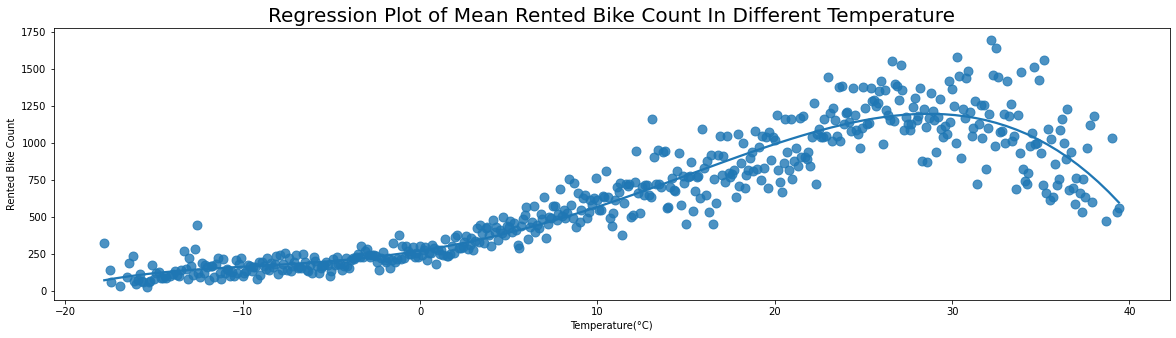

In [31]:
# regression plot of Mean Rented Bike Count In Different Temperature
plt.figure(figsize = (20,5))
sns.regplot(x="Temperature(°C)", y="Rented Bike Count", data=temp_and_rented_bike,
                 scatter_kws={"s": 80},
                 order=4, ci=None)
plt.title("Regression Plot of Mean Rented Bike Count In Different Temperature",fontsize=20)

In [40]:
#plt.figure(figsize = (50,50))
#temp_and_rented_bike.plot(x="Temperature(°C)",y="Rented Bike Count")

**Mean Rented Bike Count In Different Humidity**

In [32]:
#Mean Rented Bike Count In Different Humidity
humidity_and_rented_bike= data.groupby('Humidity(%)')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
humidity_and_rented_bike

,Humidity(%),Rented Bike Count
3,12,2032.000000
2,11,1986.000000
4,13,1451.000000
1,10,1315.000000
39,48,965.284553
...,...,...
83,92,177.851852
89,98,172.320000
87,96,170.828829
88,97,166.069364


Text(0.5, 0, 'Humidity(%)')

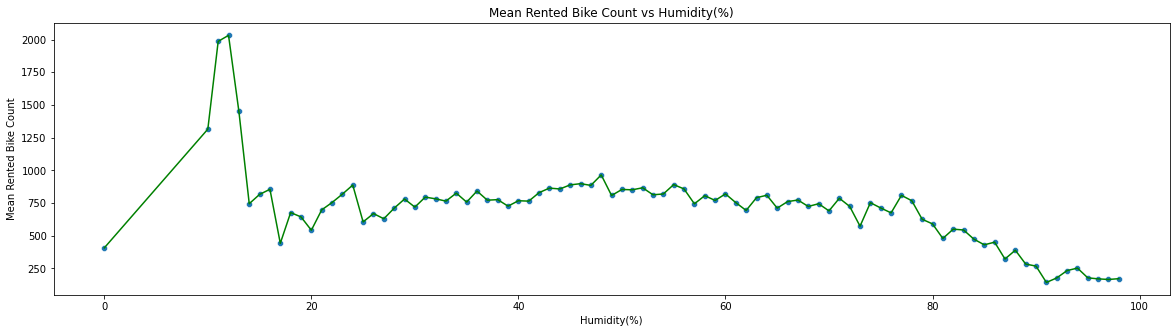

In [35]:
#Scatterplot and lineplot of Mean Rented Bike Count In Different Humidity
plt.figure(figsize = (20,5))
sns.scatterplot(x="Humidity(%)", y="Rented Bike Count", data=humidity_and_rented_bike)
sns.lineplot(x="Humidity(%)", y="Rented Bike Count", data=humidity_and_rented_bike, color='g')
plt.title('Mean Rented Bike Count vs Humidity(%)')
plt.ylabel('Mean Rented Bike Count')
plt.xlabel('Humidity(%)')

**Mean Rented Bike Count In Different Rainfall**

In [41]:
#Mean Rented Bike Count In Different Rainfall
rainfall_and_rented_bike= data.groupby('Rainfall(mm)')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
rainfall_and_rented_bike

,Rainfall(mm),Rented Bike Count
12,1.3,764.000000
0,0.0,739.311103
57,21.5,596.000000
8,0.9,489.333333
35,7.3,468.000000
...,...,...
45,12.0,13.000000
51,16.0,11.000000
53,18.0,10.500000
50,15.5,10.000000


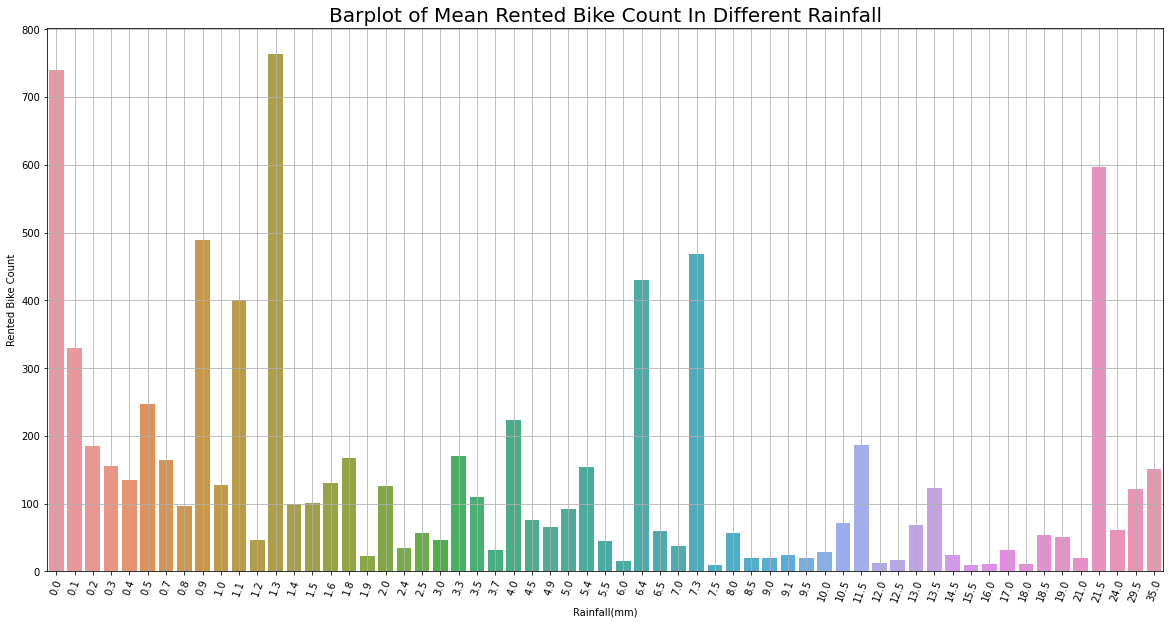

In [42]:
# Barplot of mean ranted bike coungt by rainfall
plt.figure(figsize = (20,10))
sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data=rainfall_and_rented_bike)
plt.title("Barplot of Mean Rented Bike Count In Different Rainfall",fontsize=20)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid()

**Mean Rented Bike Count In Different Seasons**

In [43]:
#Mean Rented Bike Count In Different Seasons
seasons_and_rented_bike= data.groupby('Seasons')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
seasons_and_rented_bike

,Seasons,Rented Bike Count
2,Summer,1034.073370
0,Autumn,819.597985
1,Spring,730.031250
3,Winter,225.541204


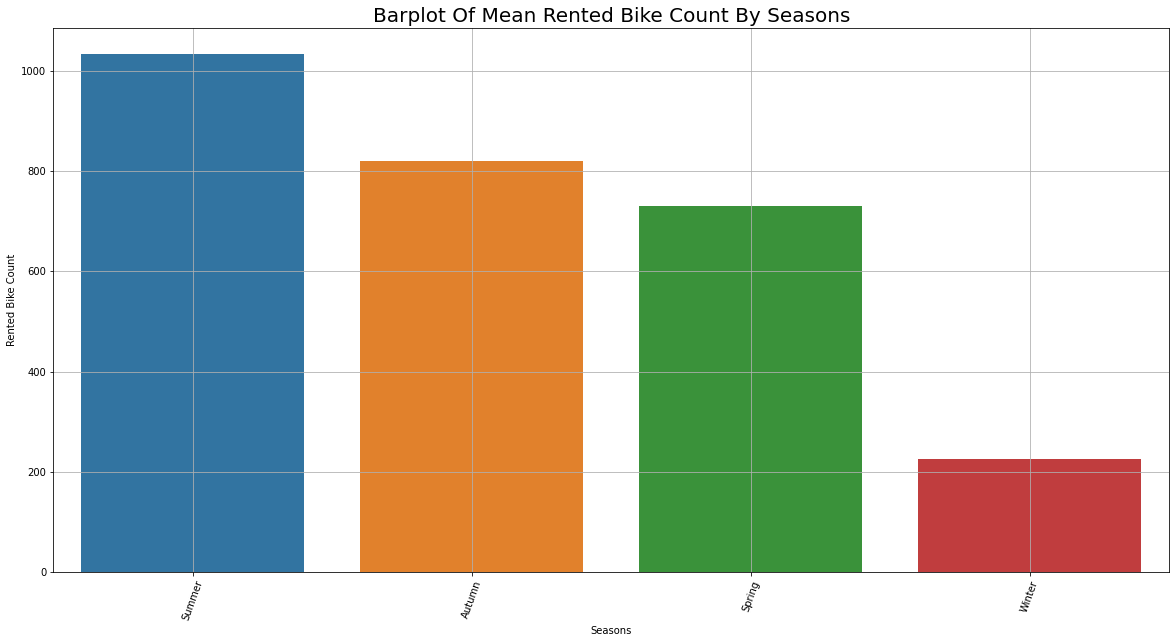

In [45]:
#Barplot of mean ranted bike count In Different Seasons
plt.figure(figsize = (20,10))
sns.barplot(x="Seasons", y="Rented Bike Count", data=seasons_and_rented_bike)
plt.title("Barplot Of Mean Rented Bike Count By Seasons",fontsize=20)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid()

**Mean Rented Bike Count In Holidays,Functioning day And In Different Year,Months And Days**

In [47]:
#Mean Rented Bike Count In Holidays
holiday_and_rented_bike= data.groupby('Holiday')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
holiday_and_rented_bike

,Holiday,Rented Bike Count
1,No Holiday,715.228026
0,Holiday,499.756944


In [50]:
#Mean Rented Bike Count In Functioning day
Functioning_Day_and_rented_bike= data.groupby('Functioning Day')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
Functioning_Day_and_rented_bike

,Functioning Day,Rented Bike Count
1,Yes,729.156999
0,No,0.000000


In [52]:
#Mean Rented Bike Count In Different Year
year_and_rented_bike= data.groupby('year')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
year_and_rented_bike

,year,Rented Bike Count
1,2018,746.879242
0,2017,249.099462


In [53]:
#Mean Rented Bike Count In Different Month
month_and_rented_bike= data.groupby('month')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
month_and_rented_bike

,month,Rented Bike Count
6,June,981.566667
5,July,929.219086
8,May,895.091398
10,October,842.725806
1,August,825.524194
0,April,772.526389
11,September,693.508333
9,November,685.294444
7,March,611.608871
2,December,419.047043


In [54]:
#Mean Rented Bike Count In Different Day
day_and_rented_bike= data.groupby('day')['Rented Bike Count'].mean().reset_index(name="Rented Bike Count").sort_values(by=['Rented Bike Count'], ascending =False)
day_and_rented_bike

,day,Rented Bike Count
4,Thursday,743.803686
0,Friday,734.449346
2,Saturday,730.348558
1,Monday,719.635833
6,Wednesday,714.521226
5,Tuesday,678.362421
3,Sunday,615.968364


<Figure size 1080x432 with 0 Axes>

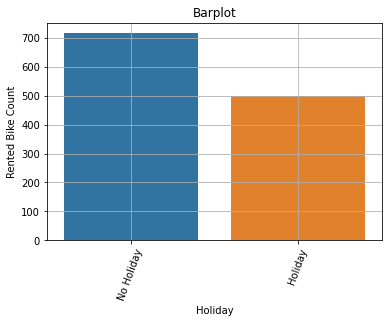

<Figure size 1080x432 with 0 Axes>

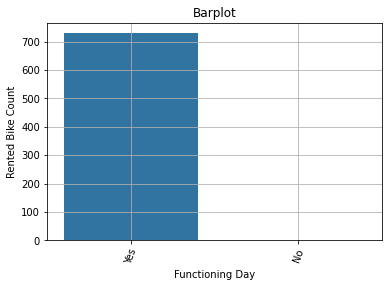

<Figure size 1080x432 with 0 Axes>

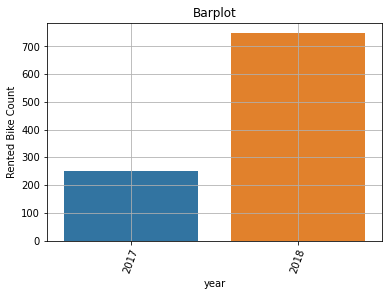

<Figure size 1080x432 with 0 Axes>

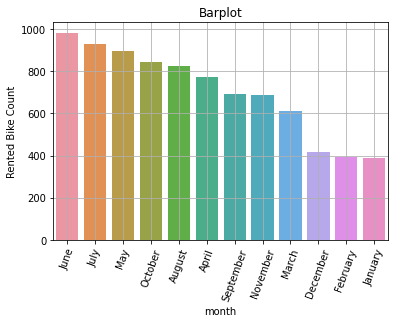

<Figure size 1080x432 with 0 Axes>

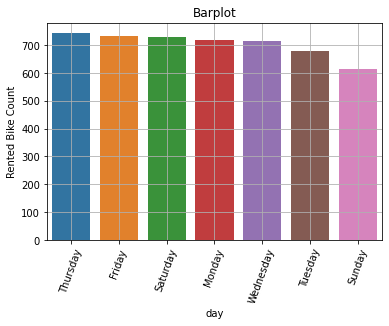

In [73]:
#Barplots of holiday_and_rented_bike,Functioning_Day_and_rented_bike,year_and_rented_bike,month_and_rented_bike,day_and_rented_bike
var=[holiday_and_rented_bike,Functioning_Day_and_rented_bike,year_and_rented_bike,month_and_rented_bike,day_and_rented_bike]
for i in var:
    plt.figure(figsize=(15,6))
    plt.subplots(1,1)
    fig = sns.barplot(x=i.columns[0], y=i.columns[1], data=i)
    plt.xticks(rotation=70, horizontalalignment="center")
    fig.set_title('Barplot')
    plt.grid()

    plt.show()

# **Final Data**

In [74]:
# Encode Categorical Variables - one hot encoding
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(data[['Seasons','Holiday','Functioning Day','year','month','day']]).toarray())

encoder_df.columns = encoder.get_feature_names(['Seasons','Holiday','Functioning Day','year','month','day'])

#merge one-hot encoded columns back with original DataFrame
final_df = data.join(encoder_df)


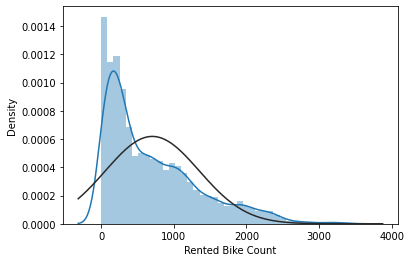

<Figure size 432x288 with 0 Axes>

In [75]:
# Target Variable Transformation
sns.distplot(final_df['Rented Bike Count'], fit=norm);
fig = plt.figure()

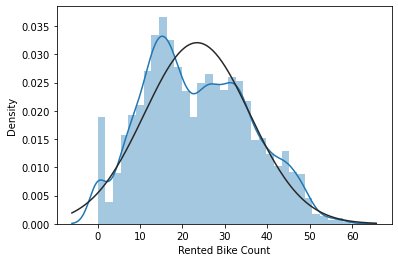

<Figure size 432x288 with 0 Axes>

In [76]:
# It looks more normal now.
sns.distplot(np.sqrt(final_df['Rented Bike Count']), fit=norm);
fig = plt.figure()

In [77]:
#Dependant variable
Y =np.sqrt(final_df['Rented Bike Count'])

In [78]:
#Independant variable
final_df.drop(columns=['Rented Bike Count','Date','year','month','day'], axis=1,inplace=True)
final_df.drop(columns=['Seasons','Holiday','Functioning Day'], axis=1,inplace=True)
X=final_df

# **Linear Regression**

In [79]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [80]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [88]:
#regressor intercept,coefficients
print("Intercept:", regressor.intercept_)
print("Coefficients:",regressor.coef_)


Intercept: -102520444180419.03
Coefficients: [ 1.10346279e+01  2.97723946e+01 -1.48386086e+01  7.09373545e-01
  1.67971463e+00 -3.11574641e+00 -5.38233806e+01 -3.53716418e-02
  3.36893748e+14  3.36893748e+14  3.36893748e+14  3.36893748e+14
  2.09338342e+14  2.09338342e+14  5.69583580e+13  5.69583580e+13
 -2.05934417e+14 -2.05934417e+14 -5.15073021e+13 -5.15073021e+13
 -5.15073021e+13 -5.15073021e+13 -5.15073021e+13 -5.15073021e+13
 -5.15073021e+13 -5.15073021e+13 -5.15073021e+13 -5.15073021e+13
 -5.15073021e+13 -5.15073021e+13 -2.43228286e+14 -2.43228286e+14
 -2.43228286e+14 -2.43228286e+14 -2.43228286e+14 -2.43228286e+14
 -2.43228286e+14]


In [73]:
regressor.score(X_train, y_train)

0.6654511607517628

In [74]:
y_pred_train = regressor.predict(X_train)

In [75]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [76]:
y_pred 

array([19.90625, 25.03125, 21.34375, ..., 14.8125 , 34.28125, 22.40625])

In [77]:
# Actual profits on test data
y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
3152     0.000000
5867    23.388031
3456    14.594520
7750    36.482873
7728    27.982137
Name: Rented Bike Count, Length: 1752, dtype: float64

In [78]:
mean_squared_error(y_test, y_pred)

53.377437083669705

In [79]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

7.1855387439881895

In [80]:
r2_score(y_train, y_pred_train)

0.6654511607517628

In [120]:
r2_score_linear_regression= r2_score(y_test, y_pred)
r2_score_linear_regression

0.6610660635389255

In [122]:
adjusted_r2_score_linear_regression=1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
adjusted_r2_score_linear_regression

Adjusted R2 :  0.6537495199863819


0.6537495199863819

# **Decision Tree**

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

In [153]:
TreeRegressor= DecisionTreeRegressor(criterion='mse', random_state=0)
TreeRegressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', random_state=0)

In [126]:
train_preds_tree=  TreeRegressor.predict(X_train)
test_preds_tree = TreeRegressor.predict(X_test)

In [127]:
R2_Score_for_train= r2_score(y_train, train_preds_tree)

In [128]:
R2_Score_for_train

1.0

In [129]:
R2_Score_for_test = r2_score(y_test, test_preds_tree)

In [130]:
R2_Score_for_test

0.8301089682610303

In [149]:
adjusted_r2_Score=1-(1-r2_score((y_test), (test_preds_tree)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
adjusted_r2_Score

0.8264415422549966

In [91]:
features = X_train.columns
importances = TreeRegressor.feature_importances_
indices = np.argsort(importances)

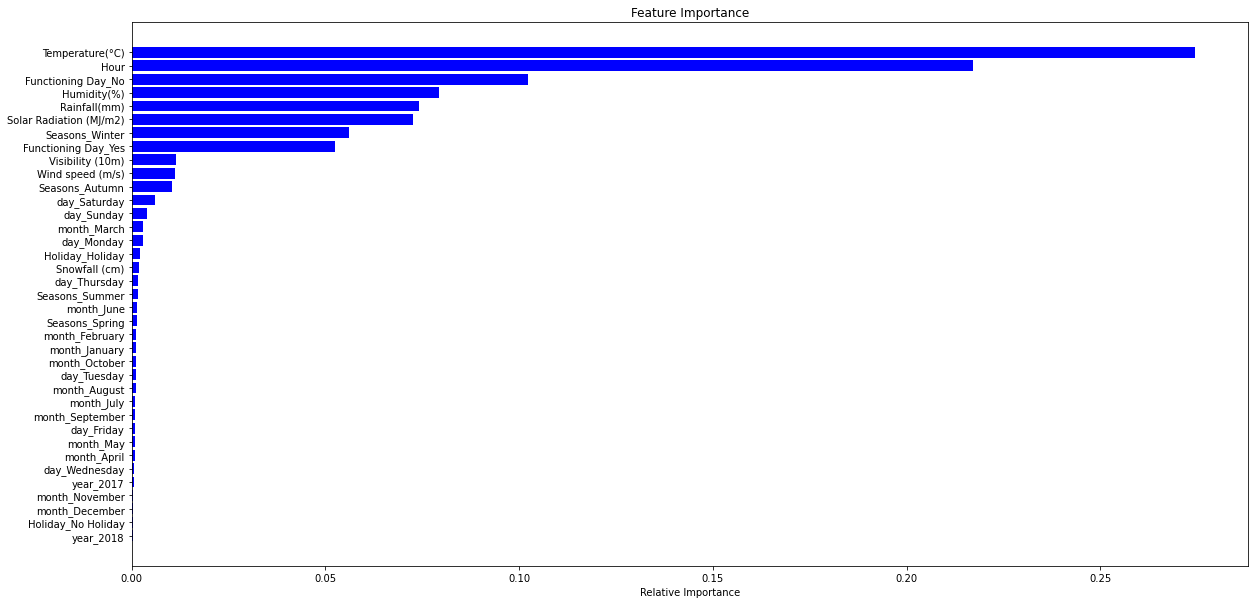

In [92]:
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Decision Tree Using Grid Search CV**

In [154]:
grid_values = {'max_depth':[3, 5, 7]}
TreeRegressorr= GridSearchCV(TreeRegressor, param_grid = grid_values, cv=5)

# Fit the object to train dataset
TreeRegressorr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='mse', random_state=0),
             param_grid={'max_depth': [3, 5, 7]})

In [155]:
TreeRegressorr.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__random_state', 'estimator__splitter', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [158]:
train_preds_treer=  TreeRegressorr.predict(X_train)
test_preds_treer = TreeRegressorr.predict(X_test)
R2_Score_for_train= r2_score(y_train, train_preds_treer)
R2_Score_for_test = r2_score(y_test, test_preds_treer)
adjusted_r2_Score_tree_regressor=1-(1-r2_score((y_test), (test_preds_treer)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [161]:
print(R2_Score_for_train)
print(R2_Score_for_test)
print(adjusted_r2_Score_tree_regressor)

0.8523024376521783
0.8028797937134317
0.8003233802424877


# **Random Forest**

In [163]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


Regressor = RandomForestRegressor() 

# Fit the object to train dataset
Regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [164]:
train_preds =  Regressor.predict(X_train)
test_preds  = Regressor.predict(X_test)

In [165]:
R2_Score_for_train= r2_score(Y_train, train_preds)

In [166]:
R2_Score_for_train

0.9886681171437348

In [167]:
R2_Score_for_test= r2_score(Y_test, test_preds)

In [168]:
R2_Score_for_test

0.9168635006282788

In [169]:
features = X_train.columns
importances = Regressor.feature_importances_
indices = np.argsort(importances)

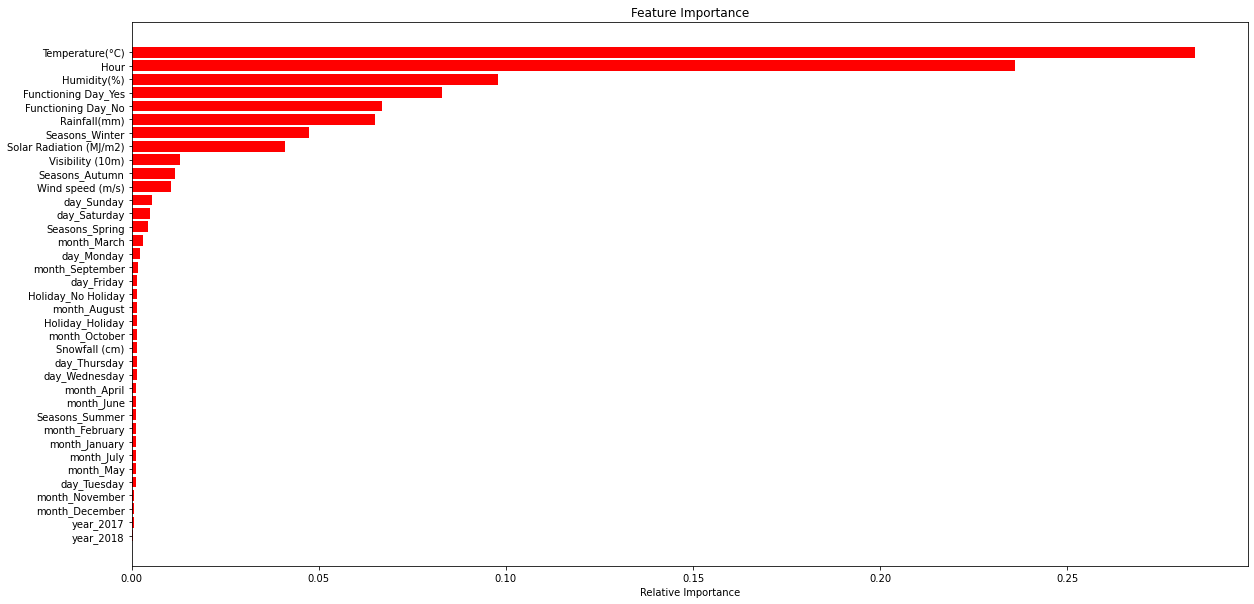

In [170]:
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

**Random Forest Using Grid Search CV**

In [171]:
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
Regressorr= GridSearchCV(Regressor, param_grid = grid_values, cv=5)

# Fit the object to train dataset
Regressorr.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]})

In [172]:
train_predsr=Regressorr.predict(X_train)
test_predsr=Regressorr.predict(X_test)

In [173]:
r2_score(Y_train, train_predsr)

0.8735840718885375

In [174]:
r2_score(Y_test, test_predsr)

0.8524577237793464

In [175]:
adjusted_r2_Score_random_forest=1-(1-r2_score((Y_test), (test_predsr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
adjusted_r2_Score_random_forest

0.8492727388200907

# **Gradient Boosting**

In [108]:


#

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.877
The mean squared error (MSE) on test set: 19.3637


**Gradient Boosting using Grid Search CV**

In [109]:
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
gbrr = GridSearchCV(gbr, param_grid = grid_values, cv=5)

# Fit the object to train dataset
gbrr.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01, loss='ls',
                                                 min_samples_split=5,
                                                 n_estimators=1000),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]})

In [110]:
print("Model Accuracy: %.3f" % gbrr.score(X_train_std, y_train))

Model Accuracy: 0.758


In [111]:
print("Model Accuracy: %.3f" % gbrr.score(X_test_std, y_test))

Model Accuracy: 0.739


# **XG Boost**

In [112]:

 

 
# Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
 
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear', seed = 123)

 
# Fitting the model
xgb_r.fit(X_train, Y_train)
 
# Predict the model
pred = xgb_r.predict(X_test)
 
# RMSE Computation
rmse = np.sqrt(mean_squared_error(Y_test, pred))
print("RMSE : % f" %(rmse))

[03:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  4.356484


In [113]:
print("Model Accuracy: %.3f" % xgb_r.score(X_train, Y_train))

Model Accuracy: 0.892


In [114]:
print("Model Accuracy: %.3f" % xgb_r.score(X_test, Y_test))

Model Accuracy: 0.879


**XG Boost Using Grid Search CV**

In [115]:
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
xgb_rr = GridSearchCV(xgb_r, param_grid = grid_values, cv=5)

# Fit the object to train dataset
xgb_rr.fit(X_train, Y_train)

[03:35:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:35:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:35:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:35:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:35:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:35:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:35:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:35:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(seed=123),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]})

In [116]:
print("Model Accuracy: %.3f" % xgb_rr.score(X_train, Y_train))

Model Accuracy: 0.969


In [117]:
print("Model Accuracy: %.3f" % xgb_rr.score(X_test, Y_test))

Model Accuracy: 0.926


In [118]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

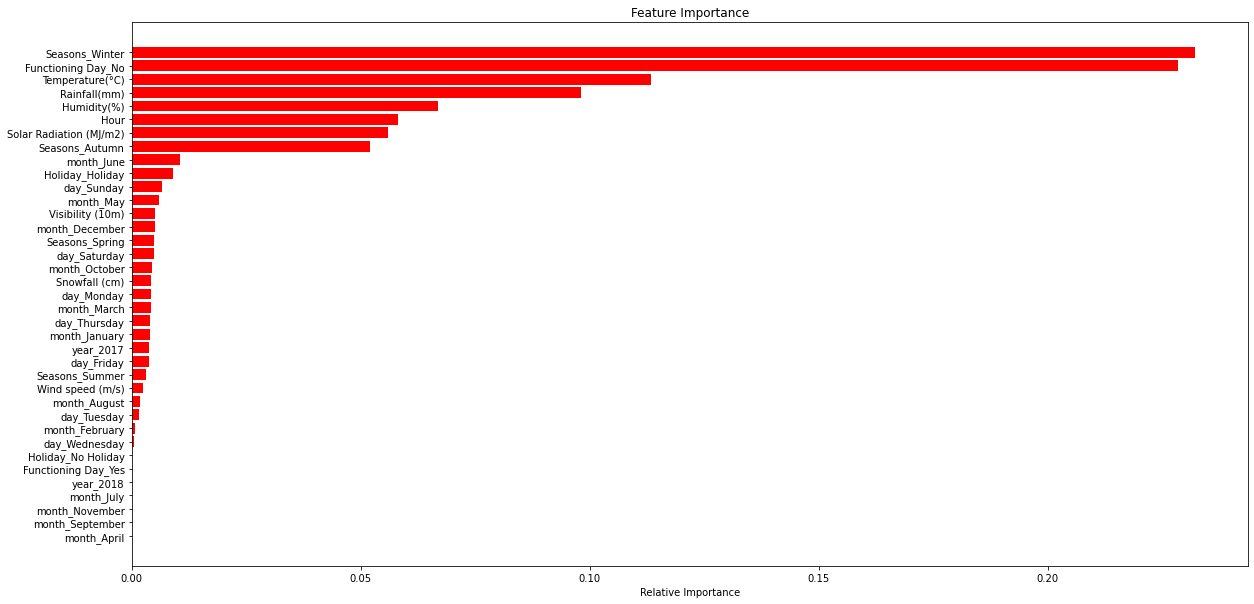

In [119]:
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()